In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [53]:
import scipy

In [54]:
import pandas as pd

In [55]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [56]:
from scipy.interpolate import interp1d

In [57]:
from dvr_setup_and_plotting_utils import *

124.97800000000001
potential written
dvr is set up


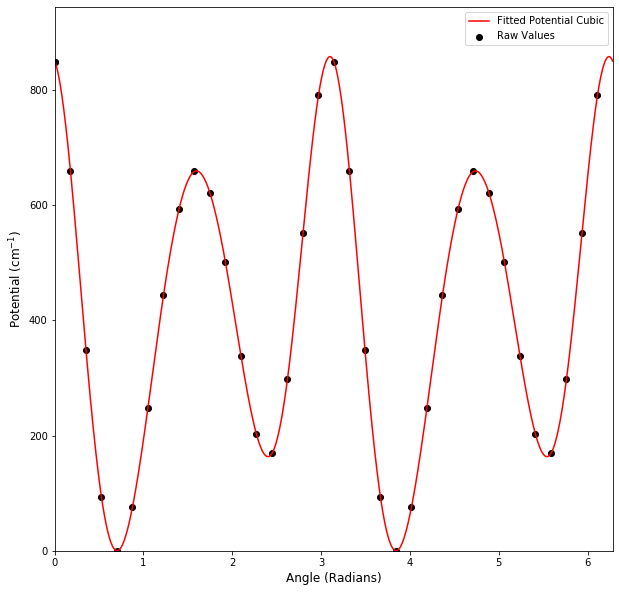

In [91]:
# Run and collect ground state

# Reduced mass of freqency calculation =  3.5708    AMU

mass_ground = 3.5708*1836*35
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500


fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot_no_opt.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_no_water_fitted.dat',
                        output_file_name='gs_scan_no_h2o')

print('dvr is set up')
# Now need to make the output potential the potential_file.dat and run 
# ./dvr_1d_periodic

In [92]:
# At this point in the directory where the files are made
# ! cp gs_scan_no_water_fitted.dat  potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


125.25099999999999
potential written
dvr is set up


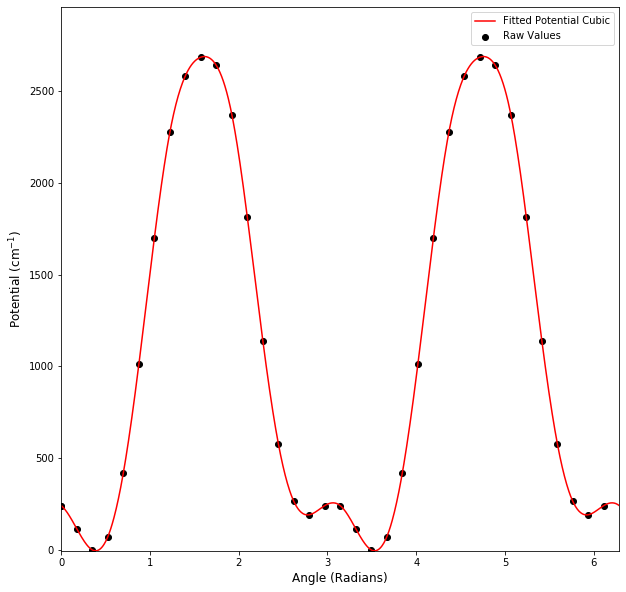

In [93]:
# run DVR
# Now run excited state

mass_excited =   3.5786*1836*35
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_no_water_gs_geom_no_opt.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_no_water_fitted.dat',
                        output_file_name='es_scan_no_h2o')

print('dvr is set up')

In [94]:
# At this point in the directory where the files are made
# ! cp es_scan_no_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above

In [95]:
# Absolute value squared of overlaps is calculated here

In [96]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_no_h2o',
                                         excited_state_file_name_root='es_scan_no_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=3000,
                                         vib_shift=263.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 2.853921021398148e-07
Calculating overlap for transition with energy 79.22133748870519
Calculating overlap for transition with energy 79.22133775139957
Calculating overlap for transition with energy 152.08727817019388
Calculating overlap for transition with energy 152.0872785908977
Calculating overlap for transition with energy 186.03133848209723
Calculating overlap for transition with energy 186.0313387560617
Calculating overlap for transition with energy 213.5705681813869
Calculating overlap for transition with energy 213.57056874494424
Calculating overlap for transition with energy 241.38062771637837
Calculating overlap for transition with energy 241.38062787352882
Calculating overlap for transition with energy 273.9286840401661
Calculating overlap for transition with energy 273.9286846273005
Calculating overlap for transition with energy 310.93887837540564
Calculating overlap for trans

Calculating overlap for transition with energy 1438.3284208035682
Calculating overlap for transition with energy 1438.3284208095188
Calculating overlap for transition with energy 1497.7918408189994
Calculating overlap for transition with energy 1497.7918411294581
Calculating overlap for transition with energy 1557.234931922486
Calculating overlap for transition with energy 1557.2349319315429
Calculating overlap for transition with energy 1616.6007770897731
Calculating overlap for transition with energy 1616.6007772148705
Calculating overlap for transition with energy 1675.830622436434
Calculating overlap for transition with energy 1675.830622470908
Calculating overlap for transition with energy 1734.8667594287838
Calculating overlap for transition with energy 1734.866759557953
Calculating overlap for transition with energy 1793.646333449107
Calculating overlap for transition with energy 1793.6463334905663
Calculating overlap for transition with energy 1852.1063888534022
Calculating ove

Calculating overlap for transition with energy 141.76935818019808
Calculating overlap for transition with energy 169.5794171516322
Calculating overlap for transition with energy 169.57941730878267
Calculating overlap for transition with energy 202.12747347541995
Calculating overlap for transition with energy 202.12747406255437
Calculating overlap for transition with energy 239.13766781065948
Calculating overlap for transition with energy 239.1376680416275
Calculating overlap for transition with energy 279.8011216523451
Calculating overlap for transition with energy 279.8011221827302
Calculating overlap for transition with energy 322.95682948758343
Calculating overlap for transition with energy 322.9568297013024
Calculating overlap for transition with energy 368.4167971623324
Calculating overlap for transition with energy 368.41679754390236
Calculating overlap for transition with energy 415.72256642725154
Calculating overlap for transition with energy 415.722566679478
Calculating overla

In [97]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_no_h2o_0',
 'excited_state_id': 'es_scan_no_h2o_0',
 'overlap': 0.012144058425481668}

In [98]:
overlap_df = pd.DataFrame(wavefunction_overlaps)

In [99]:
# Initial spectral plots

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


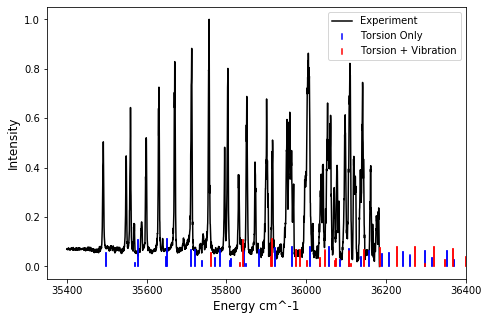

In [101]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum

offset = 35570

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36400)
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)

#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


#ax.stem(ground_vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        ground_vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='n=0 ground origin',
 #      basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_no_water_zpe_for_presentation.pdf')
plt.show()

In [102]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [103]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-100,max_freq=offset+3000,width=10.0,resolution=1.0)

In [104]:
# Plot with both spectra on each other
# Two versions, one narrow range, one wider range

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


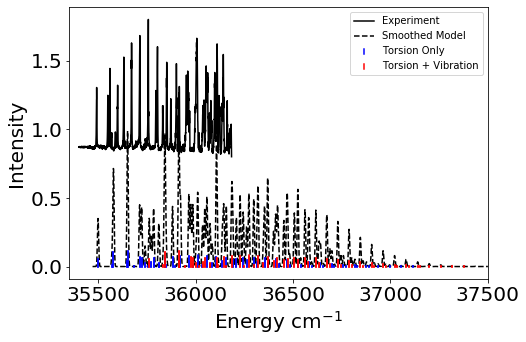

In [107]:
# Wide range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,37500)

max_freq = 38000
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_wide_range.pdf',bbox_inches='tight')
plt.show()



/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


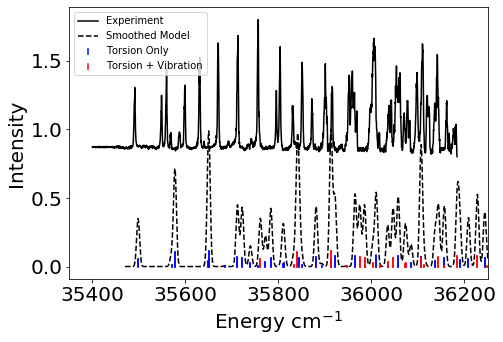

In [108]:
# Narrow Range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36250)

max_freq = 36250
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_narrow_range.pdf',bbox_inches='tight')
plt.show()



In [109]:
# Plot the lowest 4 ground state wavefunctions
ground_state_file_name_root='gs_scan_no_h2o'
excited_state_file_name_root='es_scan_no_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [110]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_no_h2o_0


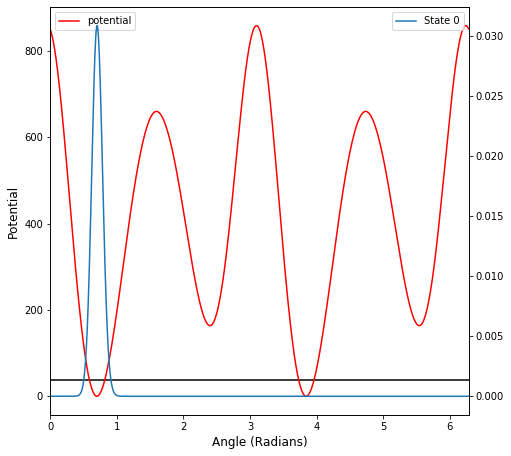

Examining state gs_scan_no_h2o_1


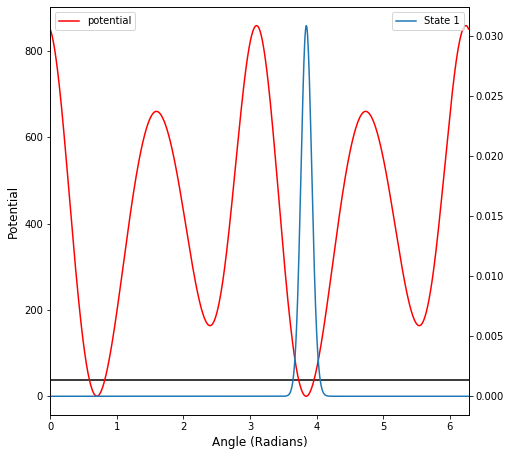

Examining state gs_scan_no_h2o_2


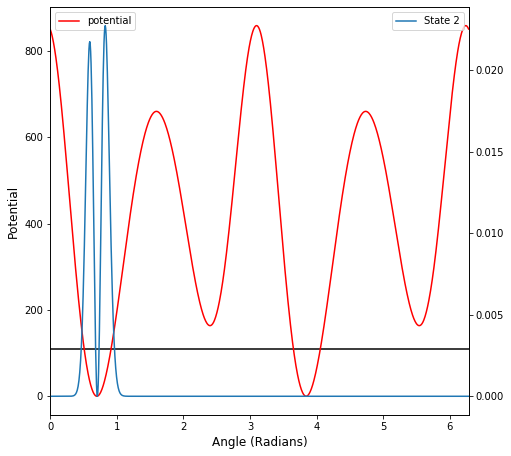

Examining state gs_scan_no_h2o_3


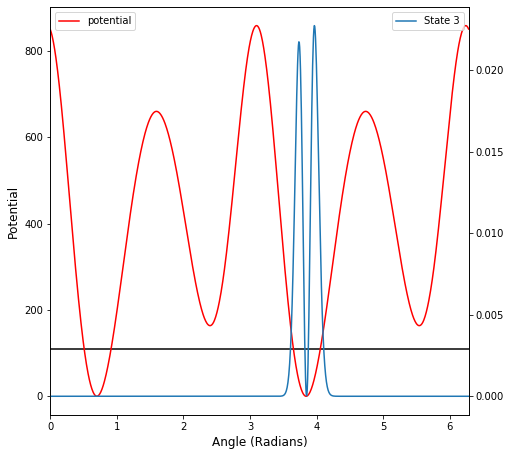

In [111]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential

wavefunction_counter = 0

max_wavefunctions = 4

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

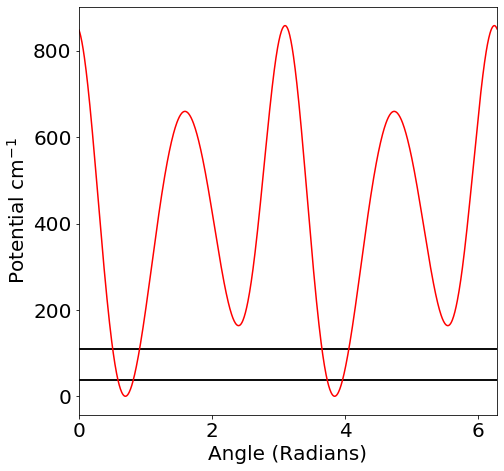

In [112]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=200)

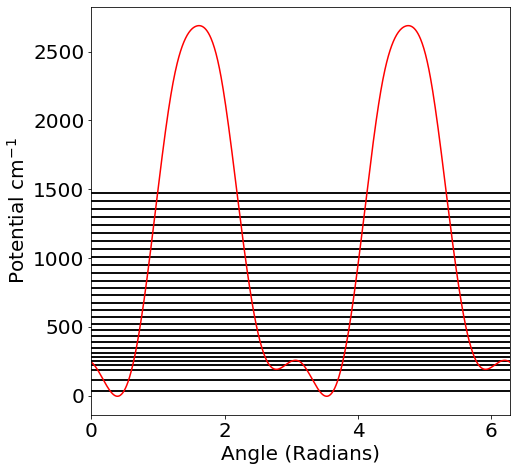

In [113]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="es_scan_no_h2o",
                      plotting_potential_name="es_scan_no_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=1500)

In [114]:
# Get maximum overlaps so we can plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(60)

,energy,ground_state_id,excited_state_id,overlap
408,0.000366,gs_scan_no_h2o_2,es_scan_no_h2o_4,0.112070
409,0.001564,gs_scan_no_h2o_2_vib_excited,es_scan_no_h2o_4_vib_excited,0.112070
610,0.000366,gs_scan_no_h2o_3,es_scan_no_h2o_5,0.111881
611,0.001564,gs_scan_no_h2o_3_vib_excited,es_scan_no_h2o_5_vib_excited,0.111881
404,0.000034,gs_scan_no_h2o_2,es_scan_no_h2o_2,0.107448
405,0.001232,gs_scan_no_h2o_2_vib_excited,es_scan_no_h2o_2_vib_excited,0.107448
606,0.000034,gs_scan_no_h2o_3,es_scan_no_h2o_3,0.107439
607,0.001232,gs_scan_no_h2o_3_vib_excited,es_scan_no_h2o_3_vib_excited,0.107439
41,0.003204,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_20_vib_excited,0.080528
40,0.002006,gs_scan_no_h2o_0,es_scan_no_h2o_20,0.080528


In [115]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_overlap_list_no_optimization.csv')